#  This is the jupyter script for making the figure of UV-distance vs Amplitude
Basically, you can run the each code with shift + return.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

#  import the text files from Plotms
You have to read the text files as below.

Please perform the combination as follows.

Please be careful for x and y axis of each plot from Plotms.

* Amplitude(x axis) + weight(y axis)
* Real(x axis) + Imaginary(y axis)
* UV wave(x axis) + (Weight * Amplitude)(y axis)
<!-- * U wave + V wave (un necessary) -->


In [2]:
### the name of txt file from the CASA task plotms -> You must type your correct file name.
AmpWt = '../J1205_phasecenter_corrected_ICRS_rmflag_vector_AmpWt.txt' # amplitude + weight txt data
RealImag = '../J1205_phasecenter_corrected_ICRS_rmflag_vector_RealImag.txt' # real + imaginary txt data
WtAmpUVwave ='../J1205_phasecenter_corrected_ICRS_rmflag_vector_WtAmp.txt' # weight ampllitude + UV wave txt data
# uwavevwave = 'J1205_phasecenter_corrected_ICRS_rmflag_vector_uv.txt' # u wave + v wave txt data
ms_list = [AmpWt, RealImag, WtAmpUVwave]

## From here, you can make the plot with only pushing shift + return

In [ ]:
### reading the data


## extruct amplitude + weight
file_path = ms_list[0]
current_directory = os.getcwd() # getting current directory
# parent_directory = os.path.dirname(current_directory) # getting parent directory
txt_path = os.path.join(current_directory, file_path)
print('ms pass is through ({})'.format(txt_path))
data = np.loadtxt(txt_path, dtype=None, skiprows=7, usecols=[0, 1])
amp = data[:, 0]
wt = data[:, 1]

## extruct real + imaginary
file_path = ms_list[1]
current_directory = os.getcwd() # getting current directory
# parent_directory = os.path.dirname(current_directory) # getting parent directory
txt_path = os.path.join(current_directory, file_path)
print('ms pass is through ({})'.format(txt_path))
data = np.loadtxt(txt_path, dtype=None, skiprows=7, usecols=[0, 1])
real = data[:, 0]
imag = data[:, 1]

## extruct weight amplitude + uvwave
file_path = ms_list[2]
current_directory = os.getcwd() # getting current directory
# parent_directory = os.path.dirname(current_directory) # getting parent directory
txt_path = os.path.join(current_directory, file_path)
print('ms pass is through ({})'.format(txt_path))
data = np.loadtxt(txt_path, dtype=None, skiprows=7, usecols=[0, 1])
uvwave = data[:, 0]
wtamp = data[:, 1]

# ## extruct uwave + uwave
# file_path = ms_list[3]
# current_directory = os.getcwd() # getting current directory
# # parent_directory = os.path.dirname(current_directory) # getting parent directory
# txt_path = os.path.join(current_directory, file_path)
# print('ms pass is through ({})'.format(txt_path))
# data = np.loadtxt(txt_path, dtype=None, skiprows=7, usecols=[0, 1])
# u = data[:, 0]
# v = data[:, 1]

ms pass is through (/Users/mahoshisawamura/Library/CloudStorage/OneDrive-NAOJ/ALMA/J1205-0000local/images/UV_amp/../J1205_phasecenter_corrected_ICRS_rmflag_vector_AmpWt.txt)
ms pass is through (/Users/mahoshisawamura/Library/CloudStorage/OneDrive-NAOJ/ALMA/J1205-0000local/images/UV_amp/../J1205_phasecenter_corrected_ICRS_rmflag_vector_RealImag.txt)
ms pass is through (/Users/mahoshisawamura/Library/CloudStorage/OneDrive-NAOJ/ALMA/J1205-0000local/images/UV_amp/../J1205_phasecenter_corrected_ICRS_rmflag_vector_WtAmp.txt)
[ 0.00144008 -0.00321029  0.00092863 ... -0.00193053  0.00218782
  0.00110755]


In [4]:
def two_comp(w,th,uvwave,wt,real):
    import scipy
    # import warnings
    # warnings.simplefilter('ignore')
    
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    plt.figure(figsize=(22,16))
    # plt.figure(figsize=(10,8))
    plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
    plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 65 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 50 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 50 # 軸だけ変更されます
    plt.rcParams['axes.linewidth'] = 3.0 # axis line width
    plt.rcParams['axes.grid'] = True # make grid
    plt.rcParams['legend.fontsize'] = 35
    
    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b,c):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)+c
        return(gauss)
    
    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b, c = param_fit
        err = (y - (gaussian(x,a,b,c)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.18,0.001] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]
    
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("Constant comp (mJy) %10.5f +/- %10.5f" % (1000*param_result[2],1000*np.sqrt(covar_result[2][2])))
    print("--------------------------------------")
        
    ### PLOT 
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1], param[2])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    plt.xlim(0, 650)
    plt.ylim(-1, 2)
    
    plt.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    plt.plot(X,1000*(gauss_result_for_plot(X,param_result)-param_result[2]), color='limegreen', lw=6, linestyle='--', label='Gaussian component')
    plt.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    # plt.errorbar(bin_centers, bin_means, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    plt.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real (Weighted)')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    plt.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    plt.xlabel(r"UV distance (k$\lambda$)")
    plt.ylabel('Amplitude (mJy)')
    # plt.savefig('amp_vs_uvdist')
    
    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    plt.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    plt.legend(loc='upper right', fontsize="xx-small")
    plt.show()

In [5]:
def one_comp(w,th,uvwave,wt,real):
    import scipy
    # import warnings
    # warnings.simplefilter('ignore')
    
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    plt.figure(figsize=(22,16))
    plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
    plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 65 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 50 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 50 # 軸だけ変更されます
    plt.rcParams['axes.linewidth'] = 3.0 # axis line width
    plt.rcParams['axes.grid'] = True # make grid
    plt.rcParams['legend.fontsize'] = 35
    
    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)
        return(gauss)
    
    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b = param_fit
        err = (y - (gaussian(x,a,b)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.3] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]
    
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("--------------------------------------")
        
    ### PLOT 
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    plt.xlim(0, 650)
    plt.ylim(-1, 2)
    
    plt.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    # plt.plot(X,1000*(gauss_result_for_plot(X,param_result)), color='limegreen', lw=6, linestyle='--', label='Gaussian component')
    # plt.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    plt.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real (Weighted)')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    plt.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    plt.xlabel(r"UV distance (k$\lambda$)")
    plt.ylabel('Amplitude (mJy)')
    # plt.savefig('amp_vs_uvdist')
    
    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    plt.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    plt.legend(loc='lower right', fontsize="xx-small")
    plt.show()

In [6]:
def create_figure(w,th,uvwave,wt,real):
    import scipy
        # import warnings
        # warnings.simplefilter('ignore')
    
    def kl2sec(x):
        """Vectorized 1/x, treating x==0 manually"""
        x = np.array(x, float)*1e+3
        near_zero = np.isclose(x, 0)
        x[near_zero] = np.inf
        x[~near_zero] = 1 / x[~near_zero]
        x = x*180*60*60/np.pi
        return x
    def sec2kl(x):
        f = x*np.pi/180/60/60
        f = 1e-3/f
        return f
        
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    fig = plt.figure(figsize=(22, 30))
    
    # plt.figure(figsize=(10,8))
    plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
    plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 65 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 50 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 50 # 軸だけ変更されます
    plt.rcParams['axes.linewidth'] = 3.0 # axis line width
    plt.rcParams['axes.grid'] = True # make grid
    plt.rcParams['legend.fontsize'] = 35
    plt.subplots_adjust(hspace=0.35)

    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)
        return(gauss)

    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b = param_fit
        err = (y - (gaussian(x,a,b)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.3] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]

    # chi-square
    ## calculate the residuals
    res = residuals(param_result,data_y,data_x,data_yerr)
    
    ## calculate the chi square
    chi_squared = np.sum(res**2)
    
    ## calculate the d.o.f
    dof = len(data_x) - len(param0)
    print(dof)
    
    ## calculate the chi square / d.o.f
    chi_squared_dof = chi_squared / dof
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print(r"%f k lambda bin" % w)
    print(r"< %f k lambda" % th)
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("chi square / d.o.f: %10.5f" % (chi_squared_dof))
    print("--------------------------------------")
        
    ### PLOT 
    ax1 =fig.add_subplot(211)
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    ax1.set_xlim(0.01, 650)
    ax1.set_ylim(-1, 2)
    
    ax1.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    # plt.plot(X,1000*(gauss_result_for_plot(X,param_result)), color='limegreen', lw=6, linestyle='--', label='Gaussian component')
    # plt.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    ax1.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    ax1.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    ax1.set_xlabel(r"UV distance (k$\lambda$)")
    ax1.set_ylabel('Amplitude (mJy)')
    ax1.text(0.04, 0.85, '(a) Gaussian fit', transform=plt.gca().transAxes, color='black')
    # plt.savefig('amp_vs_uvdist')
    
    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    ax1.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    ax1.legend(loc='lower right', fontsize="xx-small")
    
    ax2 = ax1.secondary_xaxis('top', functions=(kl2sec, sec2kl))    
    ax2.set_xlabel(r'$\theta=\lambda/|uv|$ (arcsec)')
    # print(180*60*60*1e-3/np.pi/np.linspace(0.001,650,5))
    ax2.set_xticks([4.0,2.0,1.0,0.5,0.4])
    # ax2.set_xticks(180*60*60*1e-3/np.pi/np.linspace(50.0,600.0,5))

################################################ second figure ###################################################    
    
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b,c):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)+c
        return(gauss)
    
    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b, c = param_fit
        err = (y - (gaussian(x,a,b,c)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.18,0.001] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]

    # chi-square
    ## calculate the residuals
    res = residuals(param_result,data_y,data_x,data_yerr)
    
    ## calculate the chi square
    chi_squared = np.sum(res**2)
    
    ## calculate the d.o.f
    dof = len(data_x) - len(param0)
    print(dof)
    
    ## calculate the chi square / d.o.f
    chi_squared_dof = chi_squared / dof
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print(r"%f k lambda bin" % w)
    print(r"< %f k lambda" % th)
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("Constant comp (mJy) %10.5f +/- %10.5f" % (1000*param_result[2],1000*np.sqrt(covar_result[2][2])))
    print("chi square / d.o.f: %10.5f" % (chi_squared_dof))
    print("--------------------------------------")
        
    ### PLOT 
    ax1 =fig.add_subplot(212)
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1], param[2])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    ax1.set_xlim(0.01, 650)
    ax1.set_ylim(-1, 2)
    
    ax1.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    ax1.plot(X,1000*(gauss_result_for_plot(X,param_result)-param_result[2]), color='limegreen', lw=6, linestyle='--', label='Extended component')
    ax1.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    # plt.errorbar(bin_centers, bin_means, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    ax1.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    ax1.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    ax1.set_xlabel(r"UV distance (k$\lambda$)")
    ax1.set_ylabel('Amplitude (mJy)')
    ax1.text(0.04, 0.85, r'(b) Gaussian + point source fit', transform=plt.gca().transAxes, color='black')
    # plt.savefig('amp_vs_uvdist')

    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    ax1.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    ax1.legend(loc='lower right', fontsize="xx-small")

    ax2 = ax1.secondary_xaxis('top', functions=(kl2sec, sec2kl))    
    ax2.set_xlabel(r'$\theta=\lambda/|uv|$ (arcsec)')
    # print(180*60*60*1e-3/np.pi/np.linspace(0.001,650,5))
    ax2.set_xticks([4.0,2.0,1.0,0.5,0.4])

    plt.show()

In [7]:
def create_figure_side(w,th,uvwave,wt,real):
    import scipy
        # import warnings
        # warnings.simplefilter('ignore')
    
    def kl2sec(x):
        """Vectorized 1/x, treating x==0 manually"""
        x = np.array(x, float)*1e+3
        near_zero = np.isclose(x, 0)
        x[near_zero] = np.inf
        x[~near_zero] = 1 / x[~near_zero]
        x = x*180*60*60/np.pi
        return x
    def sec2kl(x):
        f = x*np.pi/180/60/60
        f = 1e-3/f
        return f
        
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    fig = plt.figure(figsize=(52, 18))
    
    # plt.figure(figsize=(10,8))
    plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
    plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 65 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 50 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 50 # 軸だけ変更されます
    plt.rcParams['axes.linewidth'] = 3.0 # axis line width
    plt.rcParams['axes.grid'] = True # make grid
    plt.rcParams['legend.fontsize'] = 35
    plt.subplots_adjust(hspace=0.35)

    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)
        return(gauss)

    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b = param_fit
        err = (y - (gaussian(x,a,b)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.3] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]

    # chi-square
    ## calculate the residuals
    res = residuals(param_result,data_y,data_x,data_yerr)
    
    ## calculate the chi square
    chi_squared = np.sum(res**2)
    
    ## calculate the d.o.f
    dof = len(data_x) - len(param0)
    print("degree of freedom", dof)
    
    ## calculate the chi square / d.o.f
    chi_squared_dof = chi_squared / dof
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print(r"%f k lambda bin" % w)
    print(r"< %f k lambda" % th)
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("chi square / d.o.f: %10.5f" % (chi_squared_dof))
    print("--------------------------------------")
        
    ### PLOT 
    ax1 =fig.add_subplot(121)
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    ax1.set_xlim(0.01, 650)
    ax1.set_ylim(-1, 2)
    
    ax1.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    # plt.plot(X,1000*(gauss_result_for_plot(X,param_result)), color='limegreen', lw=6, linestyle='--', label='Gaussian component')
    # plt.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    ax1.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    ax1.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    ax1.set_xlabel(r"UV distance (k$\lambda$)")
    ax1.set_ylabel('Amplitude (mJy)')
    ax1.text(0.04, 0.85, '(a) Gaussian fit', transform=plt.gca().transAxes, color='black')
    # plt.savefig('amp_vs_uvdist')
    
    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    ax1.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    ax1.legend(loc='lower right', fontsize="xx-small")
    
    ax2 = ax1.secondary_xaxis('top', functions=(kl2sec, sec2kl))    
    ax2.set_xlabel(r'$\theta=\lambda/|uv|$ (arcsec)')
    # print(180*60*60*1e-3/np.pi/np.linspace(0.001,650,5))
    ax2.set_xticks([4.0,2.0,1.0,0.5,0.4])
    # ax2.set_xticks(180*60*60*1e-3/np.pi/np.linspace(50.0,600.0,5))

################################################ second figure ###################################################    
    
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    #### DEFINE THE FUNCTION
    def gaussian(x,a,b,c):
        rad = 4.8481*pow(10.0,-6.0)
        gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)+c
        return(gauss)
    
    # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    #### RESIDUALS
    def residuals(param_fit,y,x,yerr):
        a, b, c = param_fit
        err = (y - (gaussian(x,a,b,c)))/yerr
        return(err)
    
    data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    param0 = [0.002,0.18,0.001] # Initial guesses for the params a, b, c
    param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    param_result = param_output[0]
    covar_result = param_output[1]

    # chi-square
    ## calculate the residuals
    res = residuals(param_result,data_y,data_x,data_yerr)
    
    ## calculate the chi square
    chi_squared = np.sum(res**2)
    
    ## calculate the d.o.f
    dof = len(data_x) - len(param0)
    print("degree of freedom", dof)
    
    ## calculate the chi square / d.o.f
    chi_squared_dof = chi_squared / dof
        
    #### STANDARD OUTPUT
    print("--------------------------------------")
    print(r"%f k lambda bin" % w)
    print(r"< %f k lambda" % th)
    print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    print("Constant comp (mJy) %10.5f +/- %10.5f" % (1000*param_result[2],1000*np.sqrt(covar_result[2][2])))
    print("chi square / d.o.f: %10.5f" % (chi_squared_dof))
    print("--------------------------------------")
        
    ### PLOT 
    ax1 =fig.add_subplot(122)
    def gauss_result_for_plot(x,param):
        result = gaussian(x, param[0], param[1], param[2])
        return result
    
    X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    ax1.set_xlim(0.01, 650)
    ax1.set_ylim(-1, 2)
    
    ax1.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    ax1.plot(X,1000*(gauss_result_for_plot(X,param_result)-param_result[2]), color='limegreen', lw=6, linestyle='--', label='Extended component')
    ax1.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    # plt.errorbar(bin_centers, bin_means, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    ax1.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    ax1.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    ax1.set_xlabel(r"UV distance (k$\lambda$)")
    ax1.set_ylabel('Amplitude (mJy)')
    ax1.text(0.04, 0.85, r'(b) Gaussian + point source fit', transform=plt.gca().transAxes, color='black')
    # plt.savefig('amp_vs_uvdist')

    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    ax1.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    ax1.legend(loc='lower right', fontsize="xx-small")

    ax2 = ax1.secondary_xaxis('top', functions=(kl2sec, sec2kl))    
    ax2.set_xlabel(r'$\theta=\lambda/|uv|$ (arcsec)')
    # print(180*60*60*1e-3/np.pi/np.linspace(0.001,650,5))
    ax2.set_xticks([4.0,2.0,1.0,0.5,0.4])

    plt.show()

In [15]:
def no_fit(w,uvwave,wt,real):
    import scipy
    # import warnings
    # warnings.simplefilter('ignore')
    
    x = uvwave * 1e-3
    y = real * 1e+3
    wt = wt
    wty = wt * y
    
    plt.figure(figsize=(22,16))
    # plt.figure(figsize=(10,8))
    plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
    plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
    plt.rcParams["font.size"] = 65 # 全体のフォントサイズが変更されます。
    plt.rcParams['xtick.labelsize'] = 50 # 軸だけ変更されます。
    plt.rcParams['ytick.labelsize'] = 50 # 軸だけ変更されます
    plt.rcParams['axes.linewidth'] = 3.0 # axis line width
    plt.rcParams['axes.grid'] = True # make grid
    plt.rcParams['legend.fontsize'] = 35
    
    ## average term
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    # bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_wty_sum = np.bincount(bin_indices, weights=wty)[1:]
    bin_wt_sum = np.bincount(bin_indices, weights=wt)[1:]
    bin_wtave = bin_wty_sum / bin_wt_sum
    
    ## error term
    bin_counts = np.bincount(bin_indices)[1:]
    x_err = np.ones(len(bin_counts))*w/2
    
    # bin_residuals = [amp[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    bin_residuals = [y[bin_indices == i] - bin_wtave[i-1] for i in range(1, len(bin_edges))]
    residuals = np.array([value for array in bin_residuals for value in array.tolist()])
    top = np.array([np.sum(wt[bin_indices==i] * (residuals[bin_indices==i]**2)) for i in range(1, len(bin_edges))])
    bottom = (bin_counts-1) * bin_wt_sum
    std = np.nan_to_num(np.sqrt(top/bottom))
    #y_err = std / np.sqrt(bin_counts)
    y_err = std
    
    # plot position
    bin_centers = bin_edges[:-1] + w/2
    bin_centers.dtype = 'float64'
    
    # #### DEFINE THE FUNCTION
    # def gaussian(x,a,b,c):
    #     rad = 4.8481*pow(10.0,-6.0)
    #     gauss = a*np.exp(-3.55971*b*b*rad*rad*x*x*1000*1000)+c
    #     return(gauss)
    
    # # a = Gaussian amplitude, b = FWHM in the image plane, c = constant amplitude. 
    
    # #### RESIDUALS
    # def residuals(param_fit,y,x,yerr):
    #     a, b, c = param_fit
    #     err = (y - (gaussian(x,a,b,c)))/yerr
    #     return(err)
    
    # data_x = np.array(bin_centers)[bin_centers<=float(th)] # UVD (klambda)
    # data_xerr = np.array(x_err)[bin_centers<=float(th)] # Error of UVD
    # data_y = np.array(bin_wtave)[bin_centers<=float(th)] * 1e-3 # Flux (Jy) 
    # data_yerr = np.array(y_err)[bin_centers<=float(th)] * 1e-3 # Erro of flux (Jy)
    
    # param0 = [0.002,0.18,0.001] # Initial guesses for the params a, b, c
    # param_output = scipy.optimize.leastsq(residuals,param0,args=(data_y,data_x,data_yerr),full_output=True)
    # param_result = param_output[0]
    # covar_result = param_output[1]
    
        
    # #### STANDARD OUTPUT
    # print("--------------------------------------")
    # print("Gaussian amp (mJy): %10.5f +/- %10.5f" % (1000*param_result[0],1000*np.sqrt(covar_result[0][0])))
    # print("FWHM (arcsec): %10.5f +/- %10.5f" % (param_result[1],np.sqrt(covar_result[1][1])))
    # print("Constant comp (mJy) %10.5f +/- %10.5f" % (1000*param_result[2],1000*np.sqrt(covar_result[2][2])))
    # print("--------------------------------------")
        
    # ### PLOT 
    # def gauss_result_for_plot(x,param):
    #     result = gaussian(x, param[0], param[1], param[2])
    #     return result
    
    # X = np.linspace(0,th,5000,endpoint=True) # may need to adjust for your figure 
    
    plt.xlim(0, 650)
    plt.ylim(-1, 2)
    
    # plt.plot(X,1000*gauss_result_for_plot(X,param_result),color='k',lw=8,linestyle='-',label='Best fit')
    # plt.plot(X,1000*(gauss_result_for_plot(X,param_result)-param_result[2]), color='limegreen', lw=6, linestyle='--', label='Gaussian component')
    # plt.hlines(1000*param_result[2], xmin=0, xmax=th, color='cornflowerblue', linestyle='-.', linewidth=6, label='Point Source component')
    
    # plt.errorbar(bin_centers, bin_means, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real')
    plt.errorbar(bin_centers, bin_wtave, xerr=x_err, yerr=y_err, ecolor='k', markeredgecolor = "orangered", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Real (Weighted)')
    # plt.scatter(bin_centers, np.sqrt(bin_means)**(1/2), marker='o', s=500, c='cornflowerblue', edgecolor='k', alpha=0.5, label='Visivility Data')
    plt.scatter(x, y, marker='o', s=50, c='gainsboro', alpha=0.5, label='Real Data')
    # plt.title('Real vs UVwave')
    plt.xlabel(r"UV distance (k$\lambda$)")
    plt.ylabel('Amplitude (mJy)')
    # plt.savefig('amp_vs_uvdist')
    
    x = uvwave * 1e-3
    y = imag * 1e+3
    
    # ws is the width of bin
    # the border of bin
    bin_edges = np.arange(0, x.max()+w, w)
    # spritting these data to the bin and calculating the average of its
    bin_indices = np.digitize(x, bin_edges) # distributing uvdist into every single bins
    bin_means = [y[bin_indices == i].mean() for i in range(1, len(bin_edges))] # because degitizing data is start from 1
    bin_medians = [np.median(y[bin_indices == i]) for i in range(1, len(bin_edges))]
    bin_sterrs = [y[bin_indices == i].std() for i in range(1, len(bin_edges))]
    bin_counts = [np.sum(bin_indices == i) for i in range(1, len(bin_edges))]  # 各binのデータの数
    # chacking the center of bin
    bin_centers = bin_edges[:-1] + w/2
    # yaxis error bar
    y_err = bin_sterrs / np.sqrt(bin_counts)
    plt.errorbar(bin_centers, bin_means, xerr=w/2, yerr=y_err, ecolor='k', markeredgecolor = "darkgrey", markeredgewidth = 5, color='w', capsize=5, fmt='o', markersize=30, label='Averaged Imaginary')
    plt.legend(loc='upper right', fontsize="xx-small")
    plt.show()

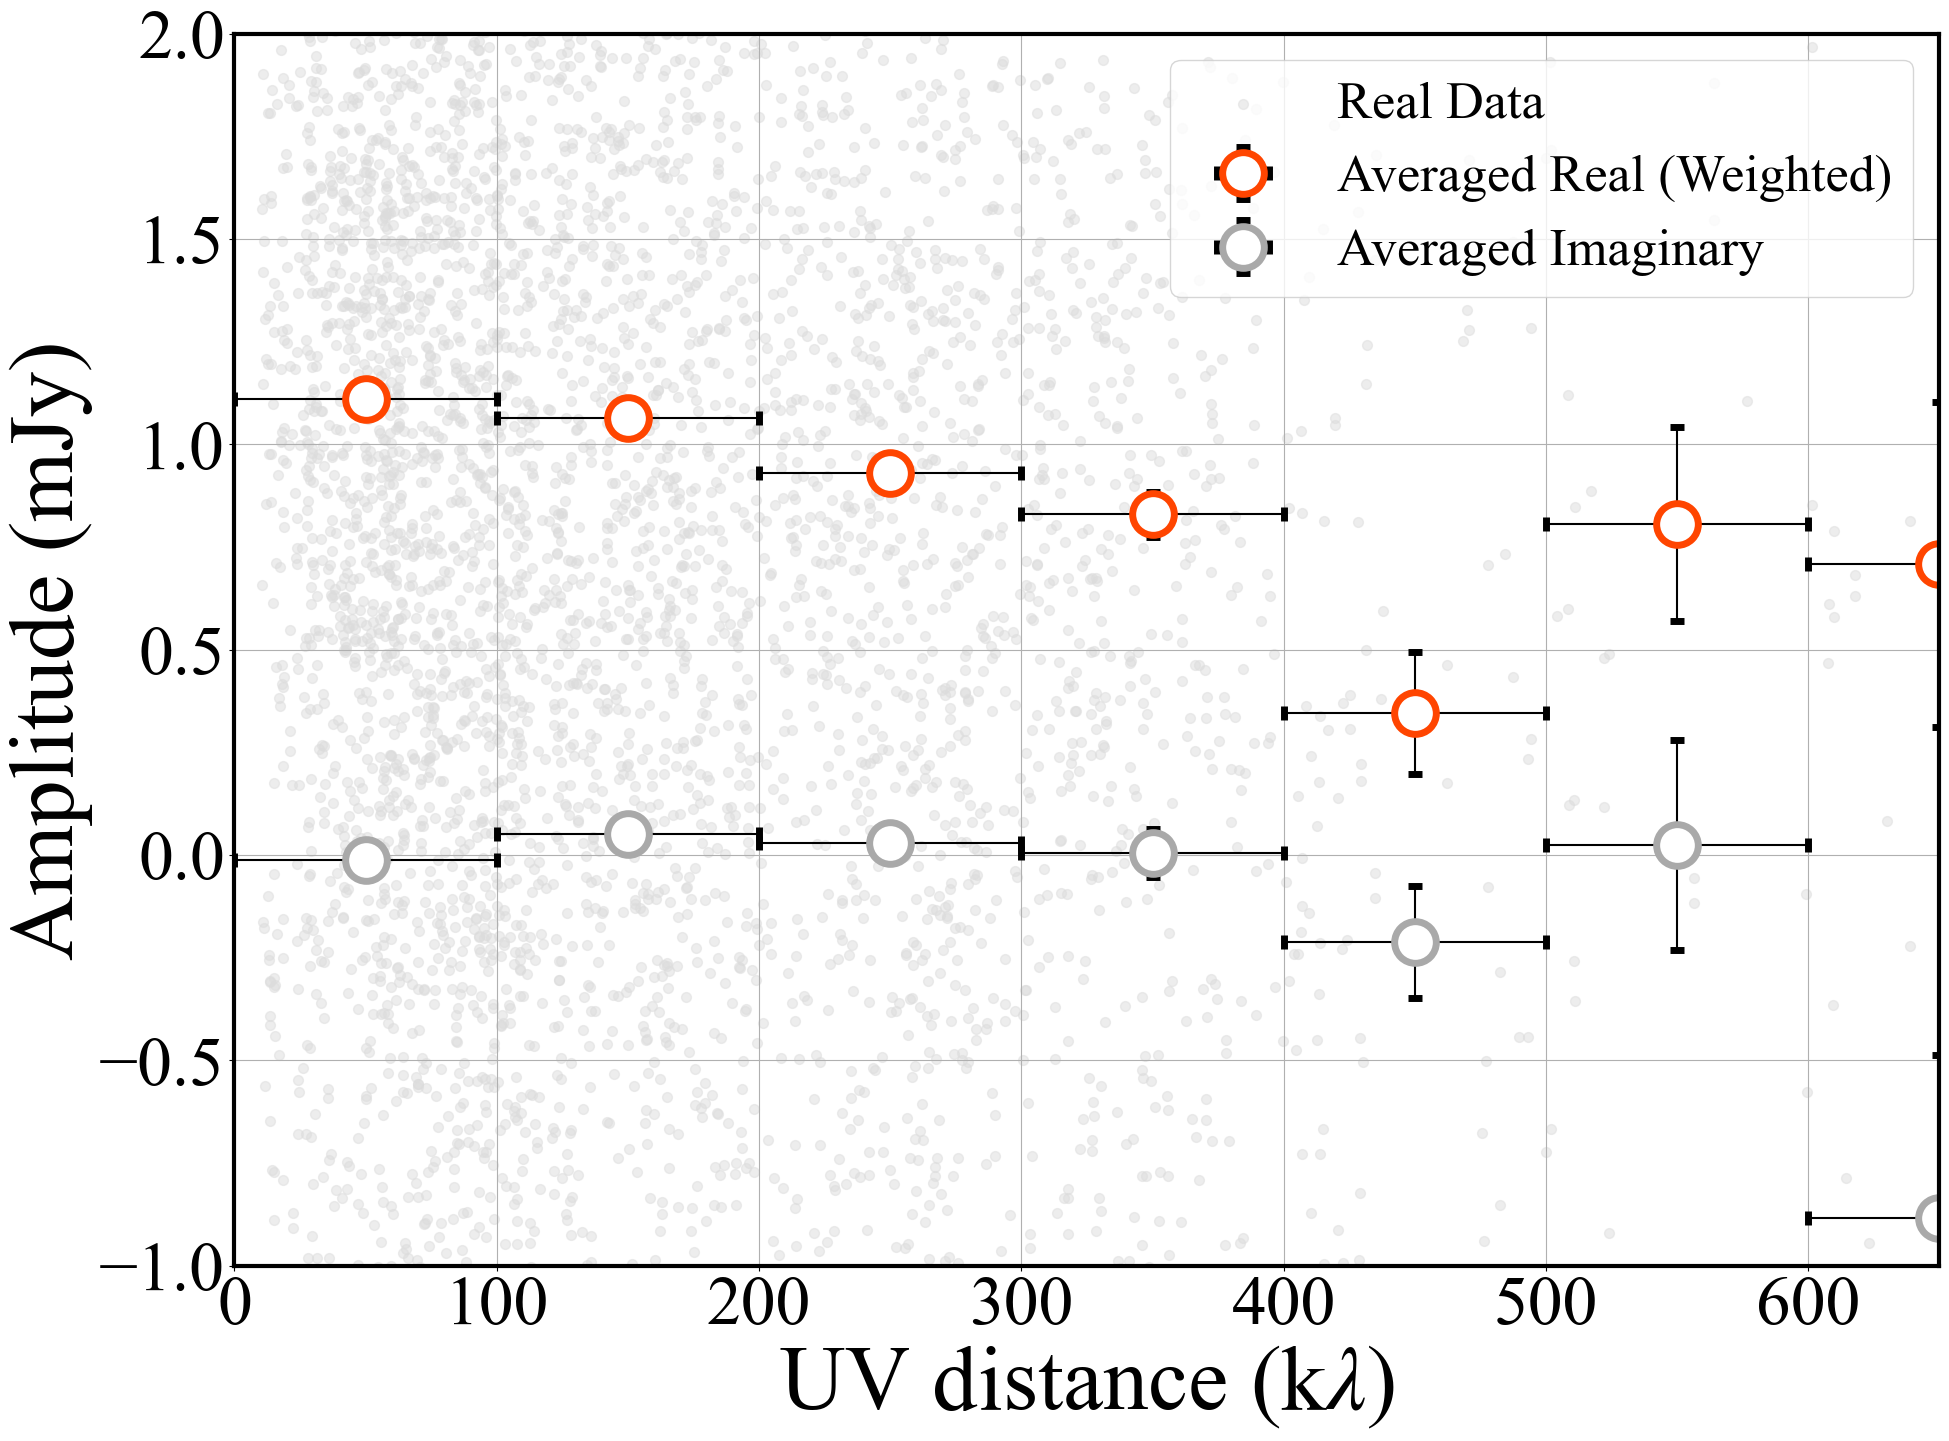

In [19]:
### make only plot without fitting

## make figure
# create_figure_side(bin= (k lambda), uvwave, wt, real)
no_fit(100, uvwave, wt, real)

In [ ]:
### make figures

## make figure side by side
# create_figure_side(bin= (k lambda), threshold= (k lambda), uvwave, wt, real)
# The threshold defines the range of UV-distances that are considered for the plot.
create_figure_side(40,400,uvwave,wt,real)

degree of freedom 8
--------------------------------------
40.000000 k lambda bin
< 400.000000 k lambda
Gaussian amp (mJy):    1.12855 +/-    0.02638
FWHM (arcsec):    0.18781 +/-    0.01821
chi square / d.o.f:    1.37413
--------------------------------------
degree of freedom 7
--------------------------------------
40.000000 k lambda bin
< 400.000000 k lambda
Gaussian amp (mJy):    0.47757 +/-    0.31145
FWHM (arcsec):    0.34188 +/-    0.19203
Constant comp (mJy)    0.66400 +/-    0.32687
chi square / d.o.f:    1.49558
--------------------------------------


/var/folders/54/7p4hc5sx7v54hh06gbplq7jw0000gp/T/ipykernel_62845/2703735574.py:16: RuntimeWarning: divide by zero encountered in divide
  f = 1e-3/f


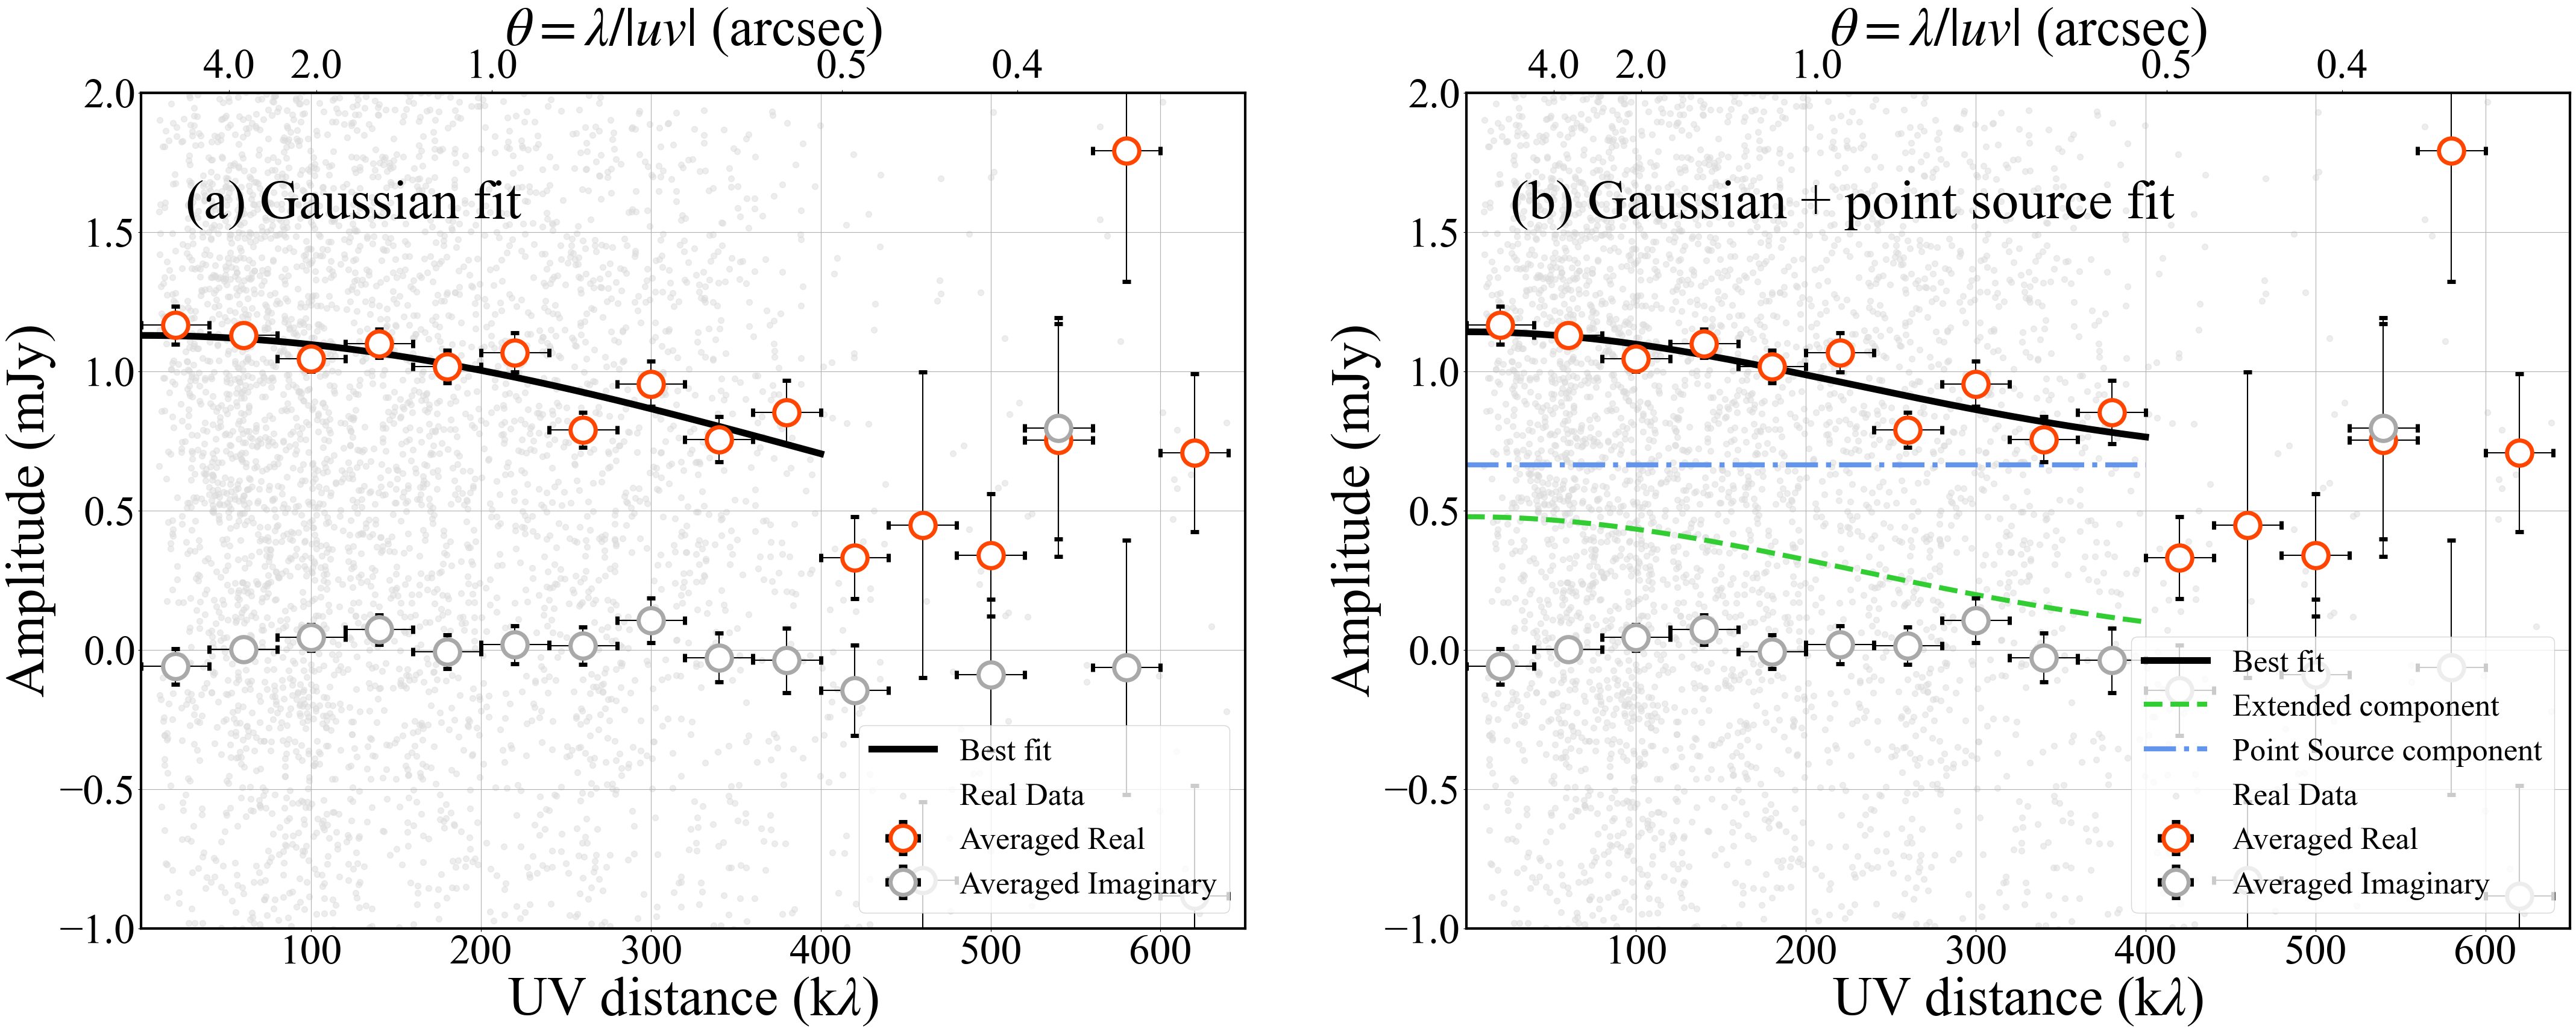

In [8]:
### make figures

## make figure side by side
# create_figure_side(bin= (k lambda), threshold= (k lambda), uvwave, wt, real)
# The threshold defines the range of UV-distances that are considered for the plot.
create_figure_side(40,400,uvwave,wt,real)

8
--------------------------------------
40.000000 k lambda bin
< 400.000000 k lambda
Gaussian amp (mJy):    1.12855 +/-    0.02638
FWHM (arcsec):    0.18781 +/-    0.01821
chi square / d.o.f:    1.37413
--------------------------------------
7
--------------------------------------
40.000000 k lambda bin
< 400.000000 k lambda
Gaussian amp (mJy):    0.47757 +/-    0.31145
FWHM (arcsec):    0.34188 +/-    0.19203
Constant comp (mJy)    0.66400 +/-    0.32687
chi square / d.o.f:    1.49558
--------------------------------------


/var/folders/54/7p4hc5sx7v54hh06gbplq7jw0000gp/T/ipykernel_62845/1496180245.py:16: RuntimeWarning: divide by zero encountered in divide
  f = 1e-3/f


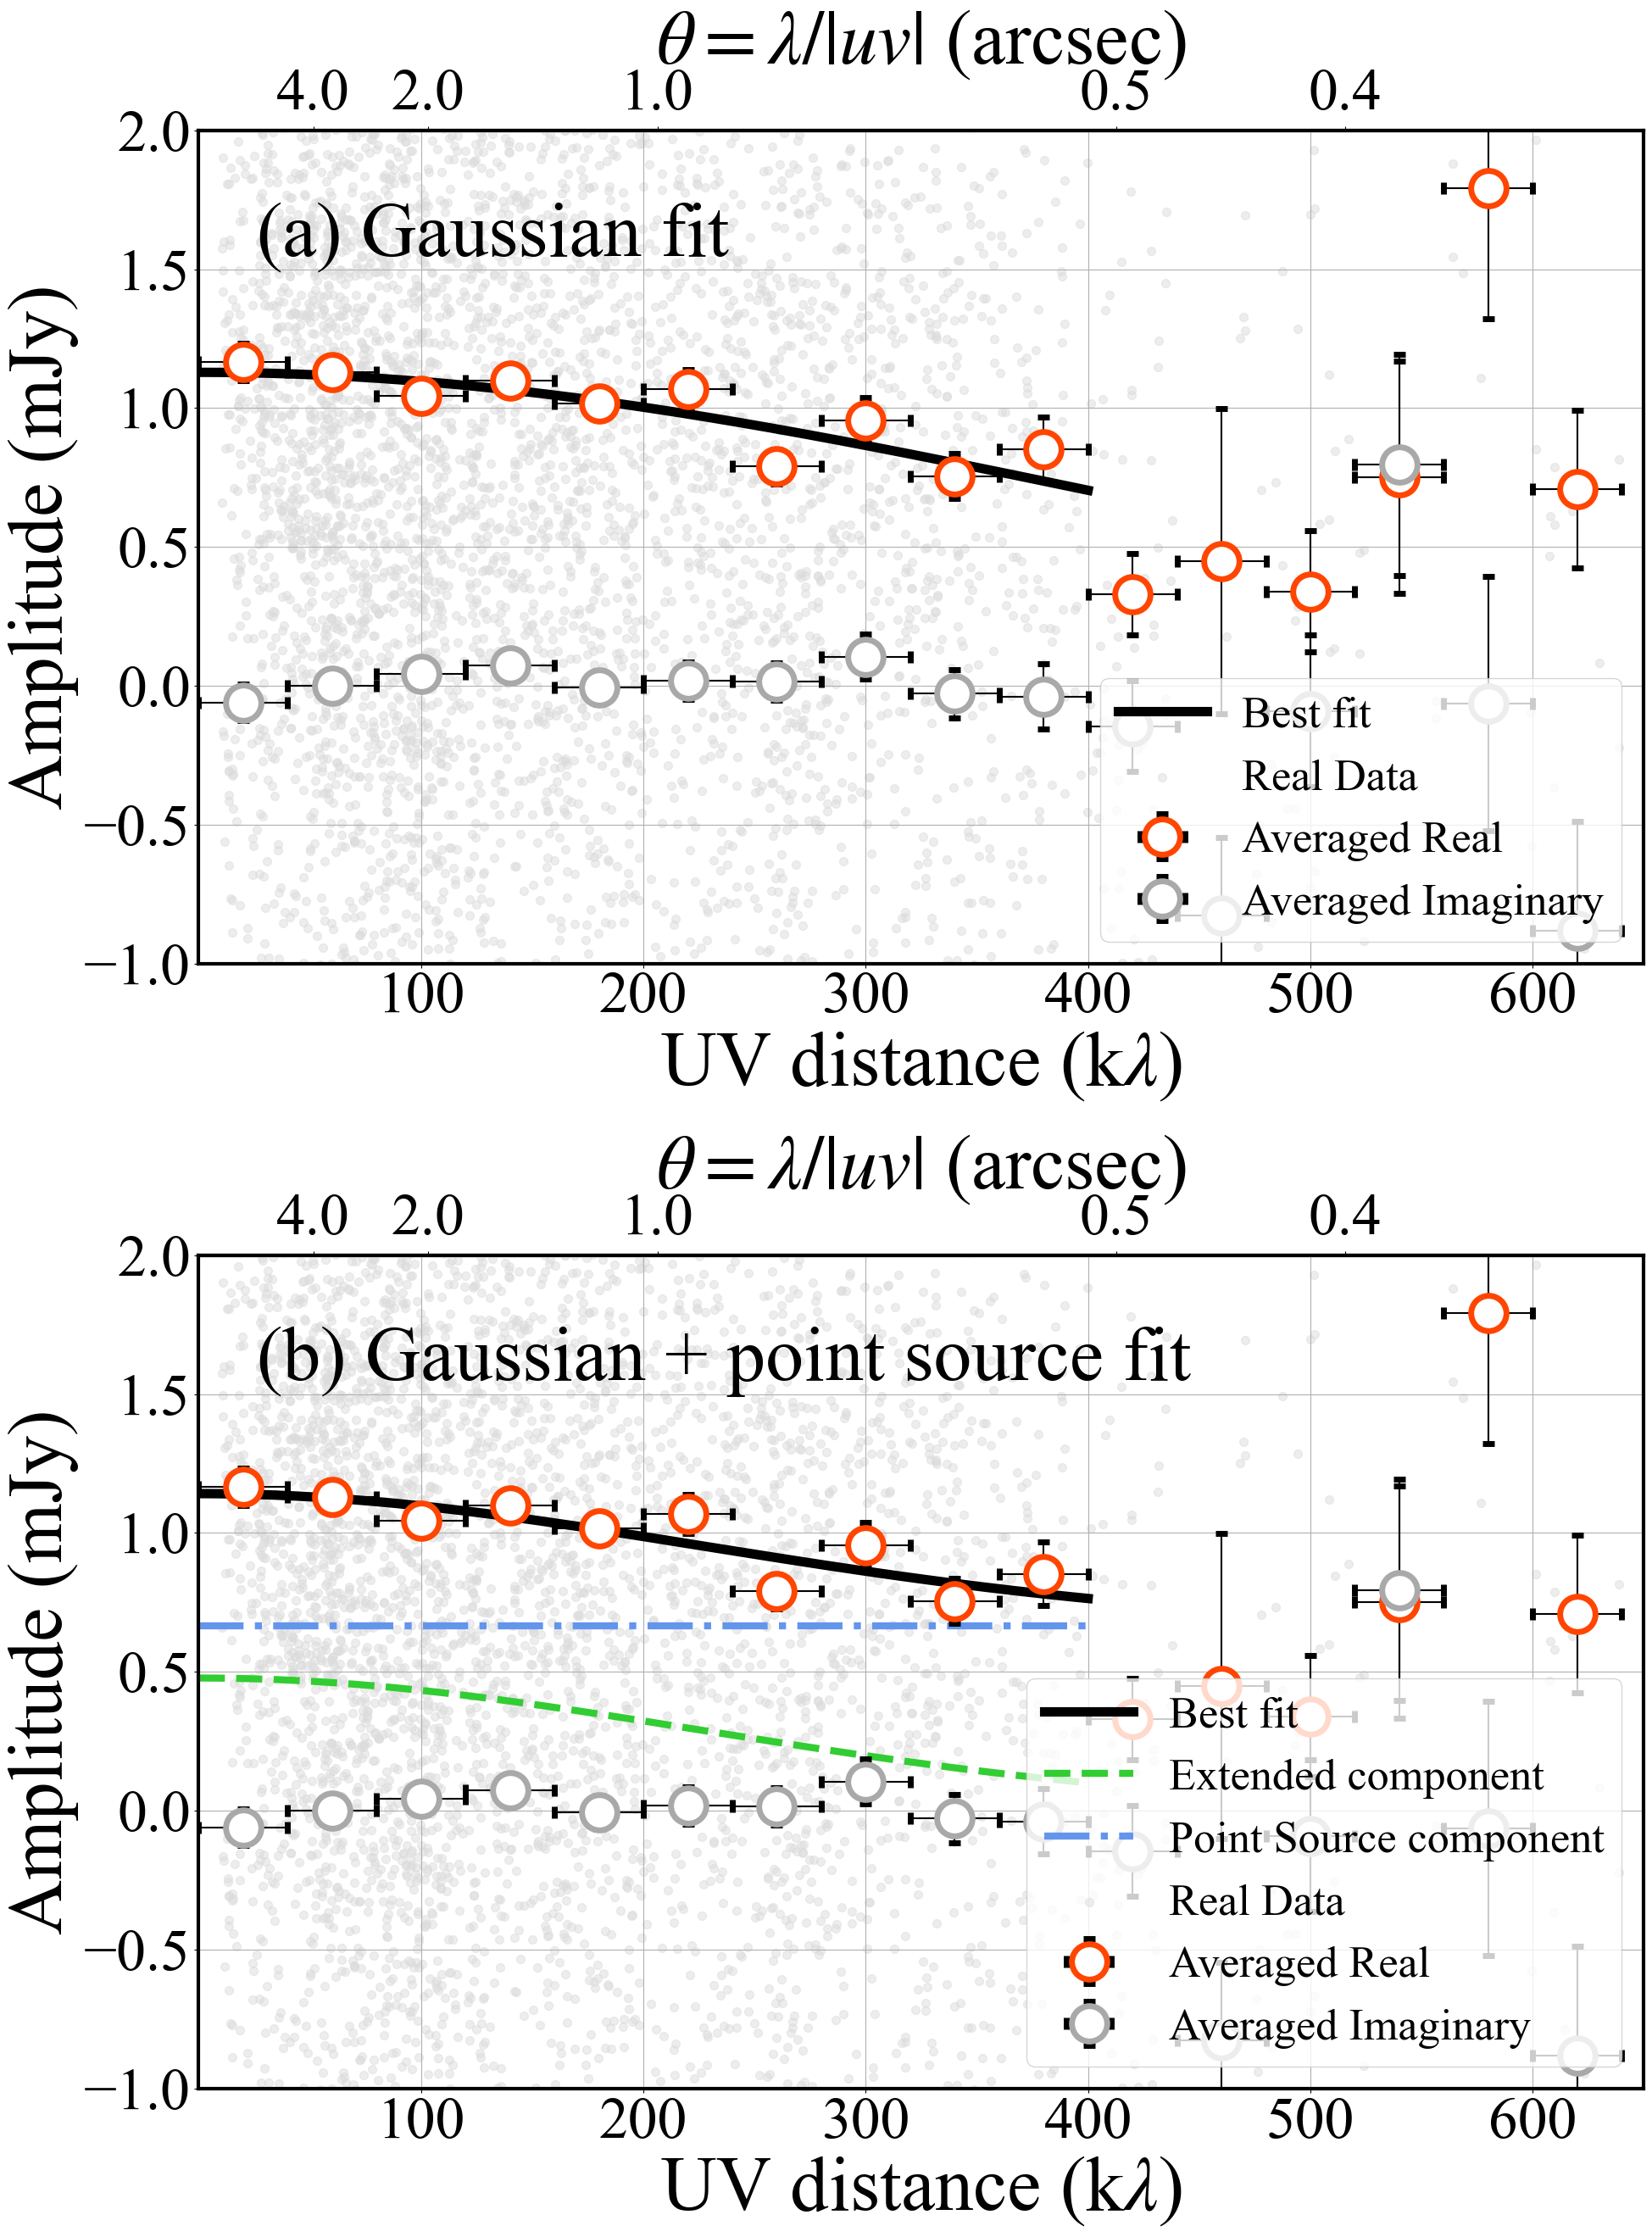

In [9]:
### make figures

## make figure in a vertical row
# create_figure(bin= (k lambda), threshold= (k lambda), uvwave, wt, real)
# The threshold defines the range of UV-distances that are considered for the plot.
create_figure(40,400,uvwave,wt,real)